# Exploring pybaseball

Have had problems getting up-to-date, relevant baseball data in the past. Found package pybaseball, a reimplementation of baseballr: https://github.com/jldbc/pybaseball

Seems promising, especially with statcast data, so I'll explore it in this notebook.

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pybaseball import statcast
pd.options.display.max_columns = 999

saveDir = '../run/explore/'

### Load up 2017 data

In [39]:
data = statcast(start_dt='2017-04-02', end_dt='2017-10-01')

This is a large query, it may take a moment to complete
Completed sub-query from 2017-04-02 to 2017-04-07
Completed sub-query from 2017-04-08 to 2017-04-13
Completed sub-query from 2017-04-14 to 2017-04-19
Completed sub-query from 2017-04-20 to 2017-04-25
Completed sub-query from 2017-04-26 to 2017-05-01


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,3,4,27,28,41,44,45,46,47,48,49,50,51,57,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2017-05-02 to 2017-05-07
Completed sub-query from 2017-05-08 to 2017-05-13


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,3,4,14,27,28,29,30,41,44,45,46,47,48,49,50,51,55,56,57,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2017-05-14 to 2017-05-19
Completed sub-query from 2017-05-20 to 2017-05-25
Completed sub-query from 2017-05-26 to 2017-05-31
Completed sub-query from 2017-06-01 to 2017-06-06
Completed sub-query from 2017-06-07 to 2017-06-12


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (41,50,51,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2017-06-13 to 2017-06-18


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,3,4,14,27,28,29,30,41,44,45,46,47,48,49,50,51,57,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2017-06-19 to 2017-06-24
Completed sub-query from 2017-06-25 to 2017-06-30
Completed sub-query from 2017-07-01 to 2017-07-06
Completed sub-query from 2017-07-07 to 2017-07-12
Completed sub-query from 2017-07-13 to 2017-07-18
Completed sub-query from 2017-07-19 to 2017-07-24
Completed sub-query from 2017-07-25 to 2017-07-30
Completed sub-query from 2017-07-31 to 2017-08-05
Completed sub-query from 2017-08-06 to 2017-08-11
Completed sub-query from 2017-08-12 to 2017-08-17


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,41,50,51,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2017-08-18 to 2017-08-23
Completed sub-query from 2017-08-24 to 2017-08-29
Completed sub-query from 2017-08-30 to 2017-09-04
Completed sub-query from 2017-09-05 to 2017-09-10
Completed sub-query from 2017-09-11 to 2017-09-16
Completed sub-query from 2017-09-17 to 2017-09-22
Completed sub-query from 2017-09-23 to 2017-09-28
Completed sub-query from 2017-09-29 to 2017-10-01


Cool, we got that (despite it taking some time), let's figure out what it looks like as a whole before diving into numbers

In [40]:
data.head(3)

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,599,FC,2017-10-01,91.9,-1.1948,5.9921,Roberto Osuna,595885.0,532077.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,Greg Bird pops out to shortstop Richard Urena.,R,L,R,NYY,TOR,X,6.0,popup,3.0,2.0,2017.0,-0.0631,1.5401,-0.4785,3.2490,NaN,NaN,NaN,2.0,9.0,Bot,108.43,103.14,NaN,NaN,607257.0,NaN,171001_213719,1.9309,-133.4022,-4.2967,-1.1718,29.8138,-13.3776,3.2855,1.4775,235.0,81.3,50.6690,90.975,2422.0,5.941,492528.0,532077.0,607257.0,475253.0,572365.0,446381.0,620446.0,485567.0,606192.0,608701.0,54.5564,0.025,0.027,0.0,1.0,0.0,0.0,3.0,63.0,6.0,Cutter,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN
1,607,FC,2017-10-01,91.8,-1.0777,6.1772,Roberto Osuna,NaN,532077.0,NaN,foul,NaN,NaN,NaN,NaN,3.0,NaN,R,L,R,NYY,TOR,S,NaN,NaN,3.0,1.0,2017.0,0.3124,1.1742,0.5540,2.8765,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,607257.0,NaN,171001_213650,3.4438,-133.4490,-4.9985,3.0138,26.8527,-17.4553,3.2855,1.4775,NaN,NaN,NaN,91.493,2415.0,6.005,492528.0,532077.0,607257.0,475253.0,572365.0,446381.0,620446.0,485567.0,606192.0,608701.0,54.4926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,5.0,Cutter,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
2,622,FF,2017-10-01,94.7,-0.6208,6.3387,Roberto Osuna,NaN,532077.0,NaN,ball,NaN,NaN,NaN,NaN,12.0,NaN,R,L,R,NYY,TOR,B,NaN,NaN,2.0,1.0,2017.0,-0.2663,1.8419,1.5362,2.7561,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,607257.0,NaN,171001_213620,6.1756,-137.3397,-7.6583,-4.7051,30.2109,-7.5693,3.4375,1.6782,20.0,75.0,-7.6433,94.150,2450.0,6.126,492528.0,532077.0,607257.0,475253.0,572365.0,446381.0,620446.0,485567.0,606192.0,608701.0,54.3712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,4.0,4-Seam Fastball,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic


In [41]:
data.describe()

,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
count,721243.000000,718938.000000,718844.000000,718844.000000,184688.000000,721243.000000,0.0,0.0,0.0,0.0,718797.000000,128147.000000,721243.000000,721243.000000,721243.0,718844.000000,718844.000000,718797.000000,718797.000000,67053.000000,132754.000000,220387.000000,721243.000000,721243.000000,127227.000000,127227.000000,0.0,0.0,719811.000000,0.0,718844.000000,718844.000000,718844.000000,718844.000000,718844.000000,718844.000000,719811.000000,719811.000000,189336.000000,203317.000000,203337.000000,715417.000000,704558.000000,718918.000000,721243.000000,721243.000000,719811.000000,719811.000000,719811.000000,719811.000000,719811.000000,719811.000000,719811.000000,719811.000000,718844.000000,127550.000000,127550.000000,184688.000000,184683.000000,184688.000000,184688.000000,127550.000000,721243.000000,721243.000000,721243.000000,721243.000000,721243.000000,721243.000000,721243.000000,721243.000000,721243.000000,721243.000000
mean,11835.238343,88.632282,-0.875069,5.892249,529338.182010,534944.064831,NaN,NaN,NaN,NaN,9.119142,4.451341,0.889484,0.887977,2017.0,-0.226229,0.787092,0.051004,2.259510,530095.660030,530200.622753,528252.467904,0.977054,4.979254,126.174060,122.644994,NaN,NaN,514807.200997,NaN,2.775396,-128.629637,-4.418076,-3.463620,25.799013,-21.964833,3.412364,1.546520,164.515533,81.520343,15.877538,88.156028,2218.648235,6.021604,491312.393950,534944.064831,514807.200997,513738.312556,537479.549919,542202.309369,555657.190026,529907.745926,541911.438204,533096.646610,54.477200,0.324194,0.371581,0.331859,0.993020,0.195519,0.153242,3.099396,39.110915,2.908845,2.317055,2.435762,2.353010,2.399807,2.435791,2.317085,2.353068,2.399807
std,6991.604890,6.022952,1.915665,0.481826,74141.600883,75067.487143,NaN,NaN,NaN,NaN,4.207148,2.478436,0.969722,0.825092,0.0,0.902690,0.762007,0.866767,0.937406,73745.943881,72763.181724,73880.966134,0.817289,2.646987,40.251839,43.799773,NaN,NaN,59333.433034,NaN,5.969767,8.700398,3.043524,10.870553,3.755672,9.047665,0.223172,0.156755,121.459699,16.400044,29.134740,6.320101,309.217148,0.516258,700.541372,75067.487143,59333.433034,62247.825708,65426.679728,75297.909744,66159.261545,80040.701986,66690.201411,66920.536455,0.516451,0.291621,0.395506,0.522826,0.083252,0.396601,0.580262,1.258796,23.069991,1.733229,2.675999,2.668099,2.626533,2.717904,2.668116,2.676005,2.626557,2.717904
min,0.000000,40.900000,-6.504800,-0.026300,112526.000000,112526.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,2017.0,-4.150400,-4.240900,-10.543300,-5.183700,112526.000000,112526.000000,112526.000000,0.000000,1.000000,3.400000,2.260000,NaN,NaN,425772.000000,NaN,-21.867400,-151.400100,-19.770600,-59.290100,-0.524400,-72.189700,2.509100,0.760200,0.000000,3.400000,-87.127200,36.030000,413.000000,-0.916000,490098.000000,112526.000000,425772.000000,400284.000000,400284.000000,134181.000000,408314.000000,136860.000000,400085.000000,136860.000000,28.578700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5816.000000,84.500000,-2.219400,5.622700,460576.000000,476451.000000,NaN,NaN,NaN,NaN,5.000000,2.000000,0.000000,0.

### Into the numbers

The motivation for looking into this is curiousity about aggregate numbers for launch speed and launch angle, and compare against outcome, so lets try to do that. Starting with launch speed.

In [43]:
launch = data.launch_speed.dropna()
round(launch.mean(),2)

81.52

In [44]:
d_hit = data[data.description == 'hit_into_play']
round(d_hit.launch_speed.dropna().mean(),2)

83.56

Balls hit into play are on average ~2 mph faster than all types, now lets compare different types

In [194]:
def launch_speed_by_bbtype(bb_type, df):
    skimmed_df = data.loc[(data['bb_type'] == bb_type) & (data['description'] == 'hit_into_play')]
    mean = round(skimmed_df.launch_speed.mean(),2)
    std = round(skimmed_df.launch_speed.std(),2)
    return mean, std

In [195]:
print "Format (mean, standard deviation)"
for bb_type in data.bb_type.dropna().unique():
    print "{0}: {1}".format(bb_type, launch_speed_by_bbtype(bb_type, data))

Format (mean, standard deviation)
popup: (76.88, 10.28)
ground_ball: (80.15, 16.89)
fly_ball: (89.18, 7.8)
line_drive: (91.0, 11.6)


What we can take from this is that the average launch speed progresses like line drive > fly ball > ground ball > pop-up

Ground balls seem to have the widest spread, fly balls the lowest.

Let's try looking at the distributions of these...

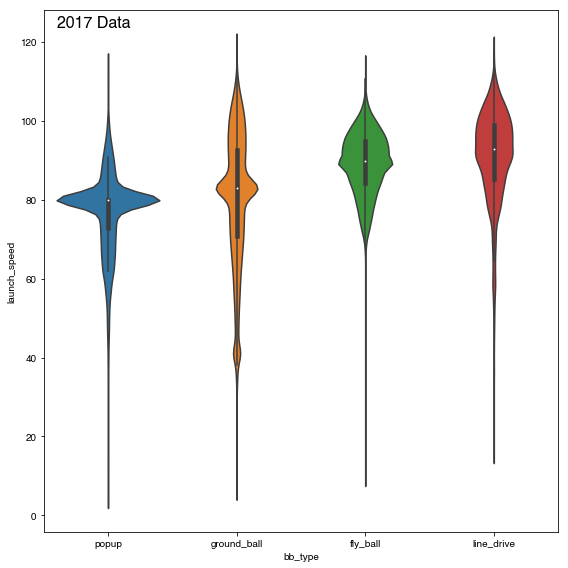

In [196]:
# create a skimmed dataframe with only the columns we want, drop nans
#plt.rcParams["figure.figsize"]=8,8
d_short = data[data.description == 'hit_into_play']
df_plotting = d_short[['launch_speed','bb_type']]
sns.violinplot(x="bb_type", y="launch_speed",kind='swarm', data=df_plotting)
plt.annotate('2017 Data', xy=(0.1,0.95), textcoords='figure fraction', fontsize=16)
plt.tight_layout()
plt.savefig(saveDir+'LS_bbtype_violin')

In [200]:
def plot_by_type(bb_type, df):
    df_skimmed = df[df.bb_type == bb_type]
    plt.hist(df_skimmed['launch_speed'], alpha=0.5)

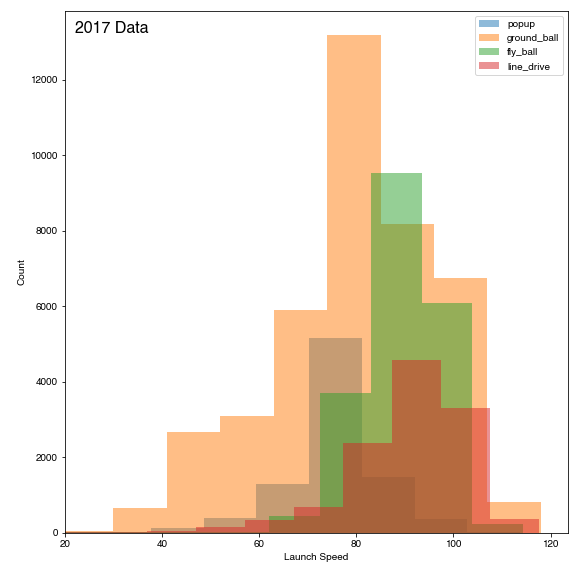

In [205]:
sns.color_palette('colorblind')
bb_types = data.bb_type.dropna().unique()
for bb_type in bb_types:
    plot_by_type(bb_type, df_plotting)
leg = plt.legend(bb_types)

plt.xlabel('Launch Speed')
plt.ylabel('Count')
# This line doesn't work for some reason...
plt.annotate('2017 Data', xy=(0.65,0.5), textcoords='figure fraction', fontsize=16)
ax = plt.gca()
ax.set_xlim(xmin=20)
plt.annotate('2017 Data', xy=(22,13250), fontsize=16)
plt.tight_layout()
plt.savefig(saveDir+'LS_bbtype_hist')

In [206]:
data.events.unique()

array(['field_out', nan, 'strikeout', 'sac_bunt', 'walk', 'double',
       'home_run', 'single', 'sac_fly', 'grounded_into_double_play',
       'fielders_choice', 'hit_by_pitch', 'field_error',
       'pickoff_caught_stealing_2b', 'force_out', 'triple',
       'fielders_choice_out', 'double_play', 'caught_stealing_3b',
       'caught_stealing_2b', 'strikeout_double_play', 'pickoff_2b',
       'other_out', 'pickoff_1b', 'catcher_interf', 'sac_fly_double_play',
       'caught_stealing_home', 'triple_play',
       'pickoff_caught_stealing_3b', 'batter_interference', 'run',
       'pickoff_caught_stealing_home'], dtype=object)

Now let's repeat for event type

In [207]:
def launch_speed_by_eventtype(event, df):
    skimmed_df = data.loc[(data['events'] == event)]
    mean = round(skimmed_df.launch_speed.mean(),2)
    std = round(skimmed_df.launch_speed.std(),2)
    return mean, std

In [208]:
# okay, I don't really care about all of these, just events that get on base or in-play outs
on_base = ['single','double','triple','home_run']
# Not doing outs for now, maybe come back later
outs = ['field_out','fielders_choicce','field_error','force_out','double_play','triple_play']

print "Format (mean, standard deviation)"
for event in on_base:
    print "{0}: {1}".format(event, launch_speed_by_eventtype(event, data))

Format (mean, standard deviation)
single: (89.26, 14.88)
double: (97.06, 9.84)
triple: (97.03, 7.65)
home_run: (103.16, 4.43)


Interesting that there's not a huge difference between doubles and triples. I suspect that the difference there is more in horizontal spread (triples often fall in the corners). Maybe look more into that later.

Also interesting there's not a huge spread in home run launch speed

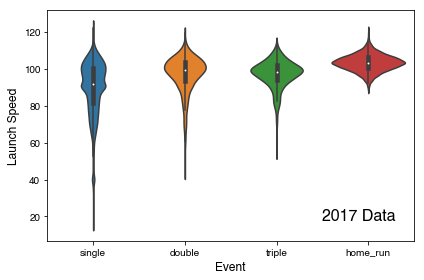

In [250]:
df_plotting = data[['launch_speed','events']]
df_plotting = df_plotting[df_plotting['events'].isin(on_base)]
sns.violinplot(x="events", y="launch_speed", data=df_plotting, order=on_base)
plt.annotate('2017 Data', xy=(2.5,18), fontsize=16)
plt.xlabel('Event',fontsize=12); plt.ylabel('Launch Speed',fontsize=12)
plt.tight_layout()
plt.savefig(saveDir+'LS_events_violin')

This plot is pretty neat in that there seems to be a pretty clear lower limit in HR launch speed. Singles have such a huge spread, probably because of bunts/infield hits

Quick look at launch angle because I'm curious right now, but will do a more full study later...

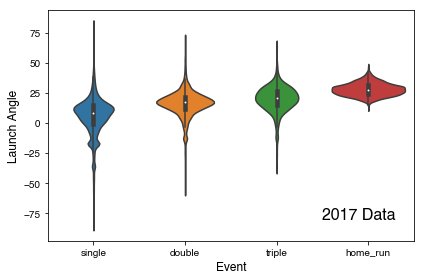

In [251]:
df_plotting = data[['launch_angle','events']]
df_plotting = df_plotting[df_plotting['events'].isin(on_base)]
sns.violinplot(x="events", y="launch_angle", data=df_plotting, order=on_base)
plt.annotate('2017 Data', xy=(2.5,-80), fontsize=16)
plt.xlabel('Event',fontsize=12); plt.ylabel('Launch Angle',fontsize=12)
plt.tight_layout()
plt.savefig(saveDir+'LA_events_violin')